In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pdfminer.high_level import extract_text

In [13]:
clean_df = pd.read_csv('data/clean_resume_data.csv')
resume = extract_text('data/Resume2.pdf')

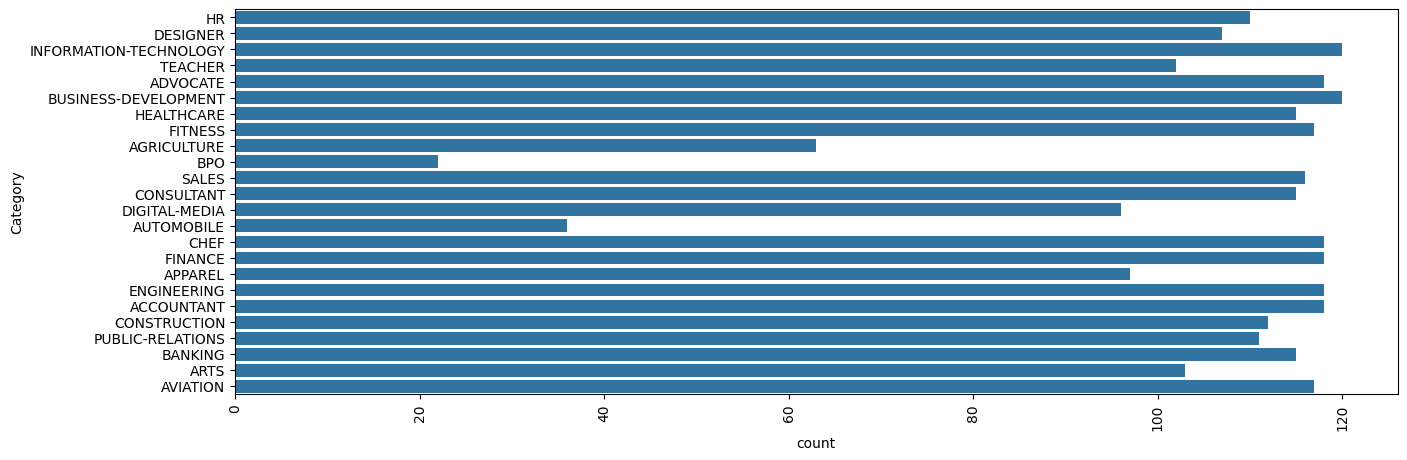

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(clean_df['Category'])
plt.xticks(rotation=90)
plt.show()

In [15]:
from sklearn.utils import resample

max_count = clean_df['Category'].value_counts().max()

balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

balanced_df = pd.concat(balanced_data)

In [16]:
balanced_df.dropna(inplace=True)

In [17]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Accuracy: 0.8368055555555556
                        precision    recall  f1-score   support

            ACCOUNTANT       0.80      0.95      0.87        21
              ADVOCATE       1.00      0.76      0.86        29
           AGRICULTURE       0.94      0.74      0.83        23
               APPAREL       0.95      0.86      0.90        21
                  ARTS       0.93      0.59      0.72        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.94      1.00      0.97        30
               BANKING       1.00      0.70      0.82        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.46      0.61      0.52        18
                  CHEF       0.84      0.96      0.90        28
          CONSTRUCTION       0.86      1.00      0.93        25
            CONSULTANT       0.95      0.61      0.75        31
              DESIGNER       0.96      0.89      0.93        28
         D

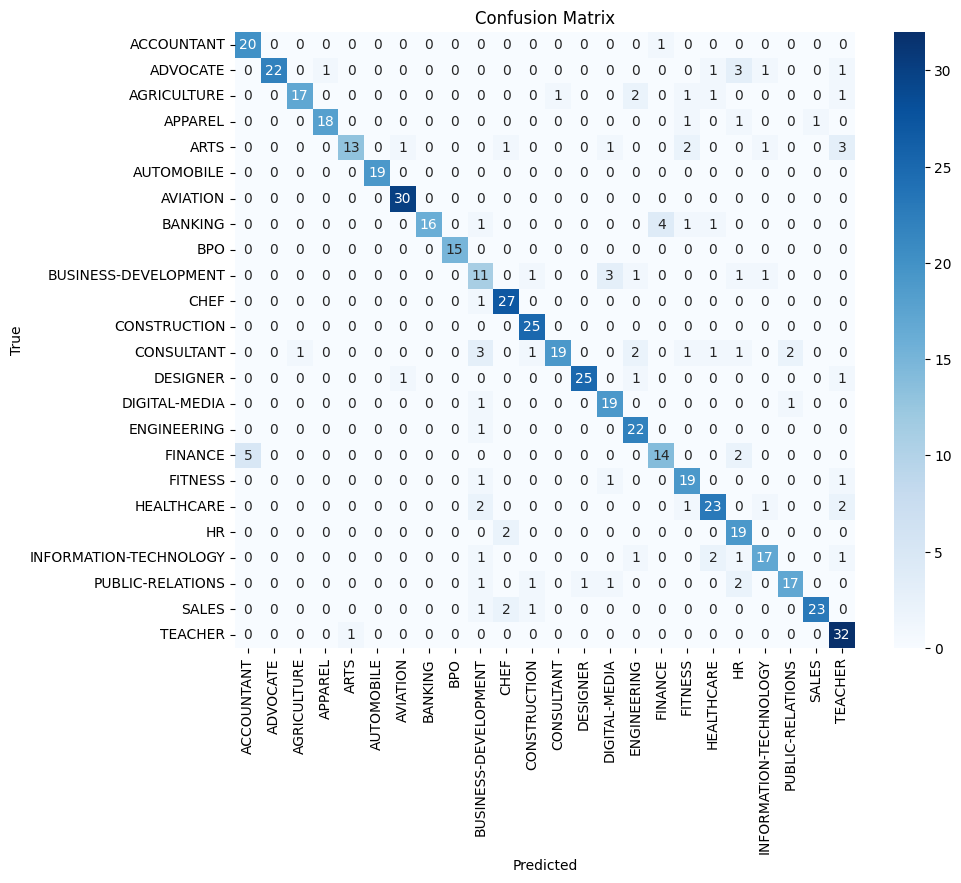

In [19]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [21]:
predicted_category = predict_category(resume)
print("Predicted Category:", predicted_category)

Predicted Category: ARTS


In [22]:
import pickle
pickle.dump(rf_classifier,open('models/categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/vectorizer_categorization.pkl','wb'))